# 4-1-2　代表的な確率分布と性質


In [33]:
# p.93
import numpy as np
from scipy.stats import binom
k = np.arange(0, 5) # array([0, 1, 2, 3, 4])
# 10回コインを振って表が0回から5回までが出る確率
binom.pmf (k, n=10, p=0.5)

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507812])

## ■ Python を使った確率分布の描画と確率関数



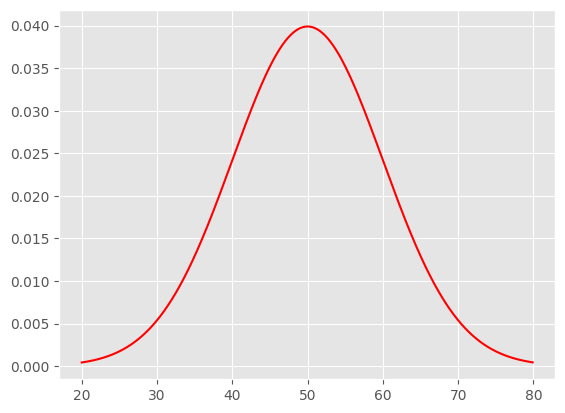

In [2]:
# p.119
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from scipy.stats import norm
X = np.arange(20, 80, 0.1)
Y = norm.pdf(X, 50, 10)
fig = plt.figure()
ax = fig.subplots()
ax.plot(X, Y, color='r')
#plt.show()

In [3]:
# p.120
from scipy.stats import norm
# 確率密度を返す
print(norm.pdf(-1.96, 0, 1))
# 分位点を返す
print(norm.ppf(0.025, 0, 1))
# 累積確率を返す
print(norm.cdf(-1.96, 0, 1))


0.058440944333451476
-1.9599639845400545
0.024997895148220435


# 4-1-3　推測統計学の基礎
## Python を使ったランダム・サンプリング

(array([3.200e+01, 2.330e+02, 9.920e+02, 2.271e+03, 3.048e+03, 2.283e+03,
        9.000e+02, 2.160e+02, 2.400e+01, 1.000e+00]),
 array([4815.74588817, 5148.73847343, 5481.7310587 , 5814.72364396,
        6147.71622923, 6480.70881449, 6813.70139976, 7146.69398502,
        7479.68657029, 7812.67915555, 8145.67174082]),
 <BarContainer object of 10 artists>)

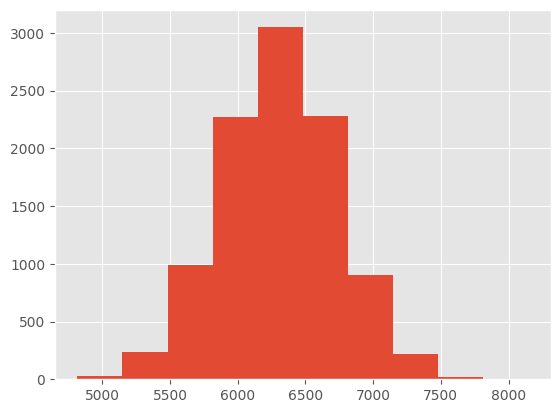

In [4]:
# p.123
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
SampMean = []
for i in range(10000):
    sample = norm.rvs(loc=6300, scale=1700, size=16)
    SampMean.append(sample.mean())

plt.hist(SampMean)
# plt.show()

# 4-1-4　統計的検定の基礎

## Python によるカイ自乗検定

In [5]:
# p.132
import pandas as pd
from scipy import stats
df = pd.DataFrame([[10, 26],
                   [10, 14]],
                  index =['P', 'N'], columns=['A', 'B'])
x2, p, _, _ = stats.chi2_contingency(df, correction=False)
print(f'p-value = {p :.3f}')
print(f'chi^2   = {x2:.2f}')

p-value = 0.264
chi^2   = 1.25


## Python による「対応」のある t検定

In [6]:
# p.136
from scipy import stats
before = [0.1, 0.3, 0.3, 0.1, 0.2, 0.3, 0.6, 0.4, 0.2, 0.3]
after = [1.1, 0.7, 0.6, 0.8, 1.3, 0.5, 0.8, 0.7, 0.9, 0.5]
t, p = stats.ttest_rel(before, after)
print(f't-value = {t :.4f}')
print(f'p-value = {p :.6f}')

t-value = -4.7239
p-value = 0.001083


## Python による等分散性の検定

In [7]:
# p.140
import numpy as np
import numpy as np
from scipy import stats
classA = np.array([54, 55, 52, 48, 50, 38, 41, 40, 53, 52])
classB = np.array([67, 63, 50, 60, 61, 69, 43, 58, 36, 29])
# 分散の比を求める
f = np.var(classB, ddof=1)/np.var(classA, ddof=1)
# 分母分子の自由度
dfn = classA.size - 1
dfd = classB.size - 1
# F分布の累積分布
p = 1 - stats.f.cdf(f, dfn, dfd)
print(f'f-value = {f :.4f}')
print(f'p-value = {p :.4f}')

f-value = 4.6367
p-value = 0.0160


## Python による「対応」のない t 検定

In [8]:
# p.141
classA = [54, 55, 52, 48, 50, 38, 41, 40, 53, 52]
classB = [67, 63, 50, 60, 61, 69, 43, 58, 36, 29]
t, p = stats.ttest_ind(classB,classA)
print(f't-value = {t :.4f}')
print(f'p-value = {p :.4f}')

t-value = 1.1191
p-value = 0.2778


## Python による等分散性を仮定しない t 検定

In [ ]:
# p.143
classA = [54, 55, 52, 48, 50, 38, 41, 40, 53, 52]
classB = [67, 63, 50, 60, 61, 69, 43, 58, 36, 29]
t, p = stats.ttest_ind(classB, classA, equal_var=False)
print(f't-value = {t :.4f}')
print(f'p-value = {p :.4f}')

## Python による乱数を利用した検定

# 4-1-5　ROC 解析と推論の評価
##  Python による ROC 解析

In [9]:
import numpy as np
import random
test = np.array([54, 55, 52, 48, 50, 38, 41, 40, 53, 52, 67, 63, 50, 60, 61, 69, 43, 58, 36, 29])
cls = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
test_diff = np.mean(test[np.where(cls==0)]) - np.mean(test[np.where(cls==1)])
n = 10000
examples = []
for i in range(n):
    grp = np.random.choice(cls, size=cls.size, replace=False)
    grp_dif = np.mean(test[np.where(grp==0)]) - np.mean(test[np.where(grp==1)])
    examples.append(grp_dif)

y = np.sum(np.abs(examples) > np.abs(test_diff))/n
print(y)

0.2662


0.8


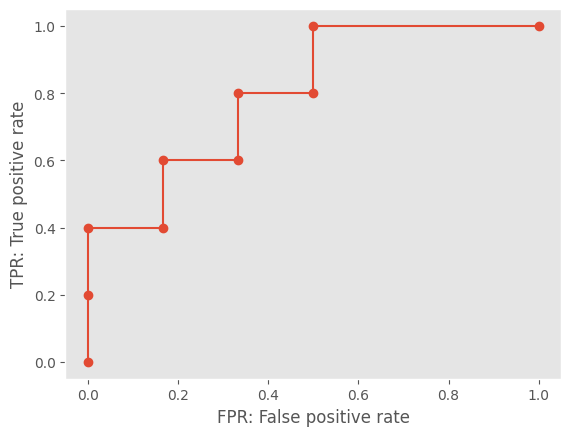

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
points = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
cls = [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
fpr, tpr, thresholds = roc_curve(cls, points)
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
print(roc_auc_score(cls, points))

# 4-2-3　単回帰分析

## Python による相関係数の算出と単回帰分析

In [12]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# csvファイルよりデータ読み込み
df = pd.read_csv('cars.csv')
#'/users/username/documents' は自分のコンピュータ環境にあわせる


<Axes: xlabel='speed', ylabel='dist'>

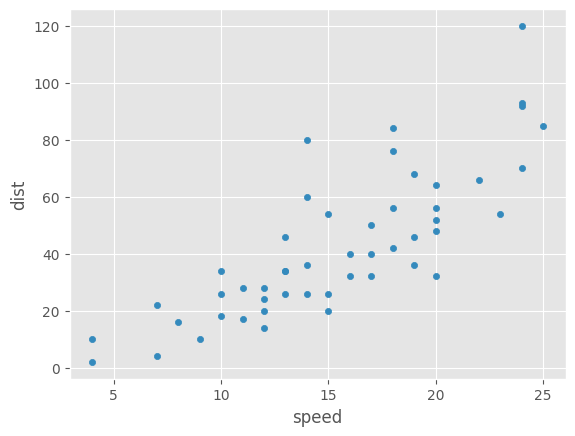

In [13]:
# pandasを使った散布図の作成
df.plot.scatter('speed', 'dist')
# plt.show()

In [14]:
df.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


In [15]:
# scikitlearnライブラリを利用
from sklearn.linear_model import LinearRegression
# 説明変数に値を代入
x = df[['speed']]
# 目的変数に値を代入
y = df[['dist']]
# 分析モデルとして回帰分析を指定
model = LinearRegression()
# x,yをもとに回帰分析実行
lin_reg = model.fit(x, y)


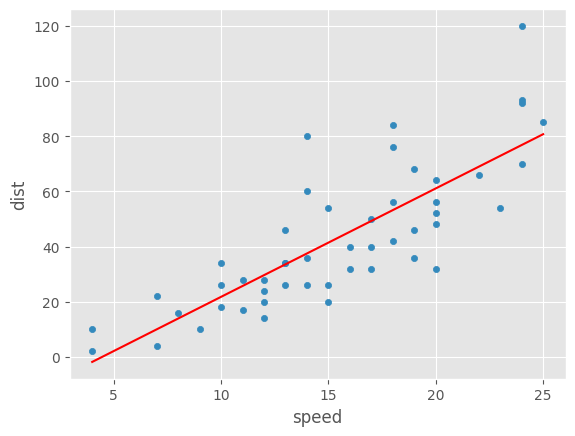

In [16]:
df.plot.scatter('speed', 'dist')
# 単回帰直線描画設定
plt.plot(x, lin_reg.predict(x), linestyle="solid", color="red")

In [21]:
# 単回帰変数，切片，単回帰方程式，および，決定変数の表示
from sklearn.metrics import r2_score
print('単回帰方程式の単回帰変数 w1: %.3f' % model.coef_.item())
print('単回帰方程式の切片 w2: %.3f' % model.intercept_.item())
print('y= %.3fx + %.3f' % (model.coef_.item(), model.intercept_.item()) )
# print('決定係数 R^2： ', model.score(x, y))
y_pred = model.predict(x)
r2 = r2_score(y, y_pred)
print('決定係数 R^2：%.3f' % r2)


単回帰方程式の単回帰変数 w1: 3.932
単回帰方程式の切片 w2: -17.579
y= 3.932x + -17.579
決定係数 R^2：0.651


In [22]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np

# csvファイルからデータの読み込み
df = pd.read_csv('ruspini.csv')
#'/users/username/documents/' は自分のコンピュータ環境にあわせて変更

<Axes: xlabel='x', ylabel='y'>

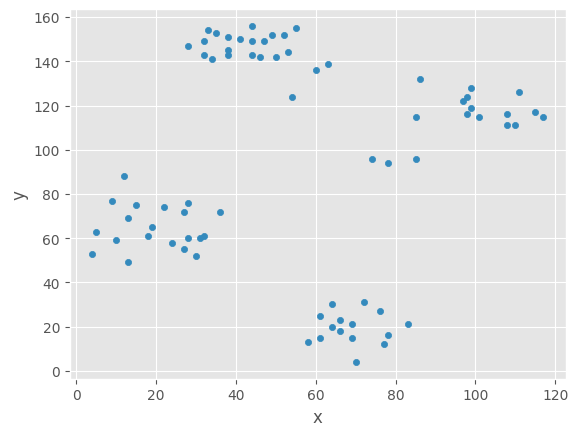

In [23]:
# pandasを使った散布図の作成
df.plot.scatter('x', 'y')
# plt.show()

In [24]:
# ライブラリの読み込み
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# 階層的クラスタリング実行
linkage_result = linkage(df, method='single', metric='euclidean')

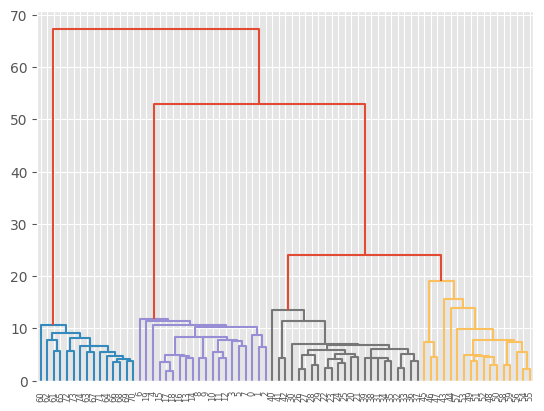

In [25]:
# 縦軸でカットする値の設定
threshold = 20
# 描画の設定
# plt.figure(figsize=(16, 9))
# 樹形図の設定
_ = dendrogram(linkage_result, color_threshold=threshold)
# plt.show()

In [26]:
cluster = fcluster(linkage_result, threshold, criterion='distance')
print(cluster)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


In [27]:
df

,rownames,x,y
0,1,4,53
1,2,5,63
2,3,10,59
3,4,9,77
4,5,13,49
...,...,...,...
70,71,66,23
71,72,61,25
72,73,76,27
73,74,72,31


In [28]:
df['cluster'] = cluster
col = df.cluster.map({1:'r', 2:'b', 3:'g', 4:'orange'})

<Axes: xlabel='x', ylabel='y'>

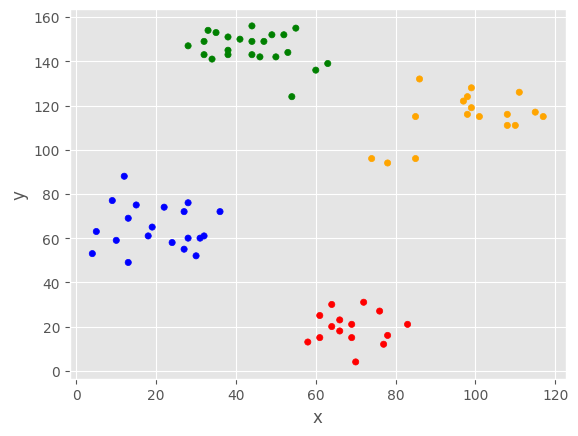

In [29]:
df.plot.scatter('x', 'y', c=col)

In [30]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# csvファイルからデータ読み込み
df = pd.read_csv('ruspini.csv')

In [31]:
# ライブラリの読み込み
from sklearn.cluster import KMeans
# デフォルトのアルゴリズムは k-means++
kmeans_mod = KMeans(n_clusters=4)
cluster = kmeans_mod.fit_predict(df)
# クラスター番号の確認
print( cluster )

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


<Axes: xlabel='x', ylabel='y'>

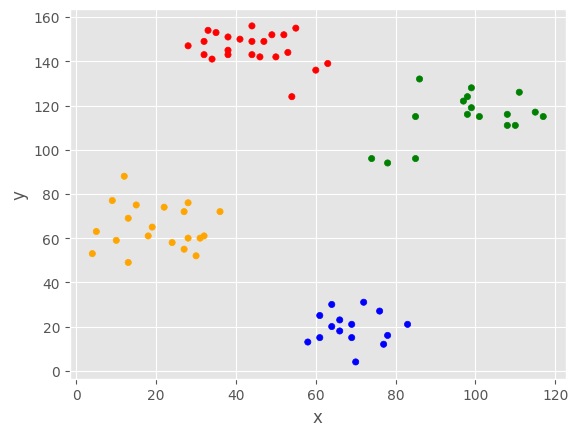

In [32]:
# クラスター番号をデータフレームに追加
df['cluster'] = cluster
# 色分けするのための情報を列として追加
col = df.cluster.map({0:'r', 1:'b', 2:'g', 3:'orange'})
# クラスターごとに色分けした散布図を作成
df.plot.scatter('x', 'y', c=col)
# plt.show()